In [124]:
import pandas as pd
import numpy as np
import seaborn as sns

In [125]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [126]:
df = pd.read_csv('cleaned_v5.csv', index_col=0)

In [127]:
df.head()

,rating,city,province,superhost,price,house_type,link,Hangers,Bed linens,Extra pillows and blankets,...,game console,guest_num,bath_num,id,pool,backyard,free carport,ski-in,beach access,balcony
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,buraydah,AlQassim,0.0,1100,Earth house,https://www.airbnb.com/rooms/44085675?previous...,1,1,1,...,1,10,3.0,0.0BuraydahAlQassimFalse1100.0Earth house,0,1,0,0,0,1
1,0.0,buraydah,AlQassim,0.0,2200,Entire chalet,https://www.airbnb.com/rooms/19854001?previous...,1,0,0,...,0,4,4.0,0.0BuraydahAlQassimFalse2200.0Entire chalet,1,0,0,0,0,0
2,0.0,buraydah,AlQassim,0.0,400,Shared room in chalet,https://www.airbnb.com/rooms/37763947?previous...,1,0,0,...,0,16,4.5,0.0BuraydahAlQassimFalse400.0Shared room in ch...,1,0,0,0,0,0
3,0.0,buraydah,AlQassim,0.0,550,Private room in resort,https://www.airbnb.com/rooms/44031535?previous...,1,1,1,...,0,5,2.0,0.0BuraydahAlQassimFalse550.0Private room in r...,1,0,0,0,0,0
4,0.0,buraydah,AlQassim,0.0,2500,Entire villa,https://www.airbnb.com/rooms/35754885?previous...,1,0,0,...,0,7,3.0,0.0BuraydahAlQassimFalse2500.0Entire villa,1,0,0,0,0,0


In [5]:
test = df[df.rating != 0]

## Problem:
province has some errors

In [128]:
df.groupby(['province'])['price'].sum().sort_values()[::-1]



province
Mecca          503947
Riyadh         489244
Eastern        136194
Medina          78948
Asir            70199
AlQassim        37641
Tabuk            8793
SaudiArabia      5167
Ha'il             600
Al Bahah          500
West              250
Jizan              85
Name: price, dtype: int64

In [129]:
to_modifiy = ['SaudiArabia',
             'West']

In [130]:
df[df['province']  == to_modifiy[0]]['link']

index
446     https://www.airbnb.com/rooms/32981610?previous...
642     https://www.airbnb.com/rooms/40233658?previous...
1080    https://www.airbnb.com/rooms/31290673?previous...
1147    https://www.airbnb.com/rooms/52120401?previous...
1148    https://www.airbnb.com/rooms/52044809?previous...
1337    https://www.airbnb.com/rooms/30261396?previous...
1358    https://www.airbnb.com/rooms/32461582?previous...
1545    https://www.airbnb.com/rooms/48231186?previous...
1635    https://www.airbnb.com/rooms/48744340?previous...
1652    https://www.airbnb.com/rooms/38116013?previous...
1716    https://www.airbnb.com/rooms/37942037?previous...
1858    https://www.airbnb.com/rooms/49905128?previous...
Name: link, dtype: object

In [131]:
df.loc[446      ,'province'] = 'Eastern'

In [132]:
df.loc[642      ,'province'] = 'Riyadh'

In [133]:
df.loc[1080      ,'province'] = 'Mecca'

In [134]:
df.loc[1147      ,'province'] = 'Mecca'

In [135]:
df.loc[1148      ,'province'] = 'Mecca'

In [136]:
df.loc[1337      ,'province'] = 'Mecca'

In [137]:
df.loc[1358      ,'province'] = 'Mecca'

In [138]:
df.loc[1635      ,'province'] = 'Riyadh'

In [139]:
df.loc[1545      ,'province'] = 'Riyadh'

In [140]:
df.loc[1652      ,'province'] = 'Riyadh'

In [141]:
df.loc[1716      ,'province'] = 'Riyadh'

In [142]:
df.loc[1858      ,'province'] = 'Tabuk'

In [143]:
df.groupby(['province'])['price'].sum().sort_values()[::-1]

province
Mecca       507047
Riyadh      490629
Eastern     136444
Medina       78948
Asir         70199
AlQassim     37641
Tabuk         9225
Ha'il          600
Al Bahah       500
West           250
Jizan           85
Name: price, dtype: int64

In [144]:
df[df['province']  == to_modifiy[1]]['link']

index
851    https://www.airbnb.com/rooms/42831842?previous...
Name: link, dtype: object

In [145]:
df.loc[851    ,'province'] = 'Mecca'

In [146]:
df.groupby(['province'])['price'].count().sort_values()[::-1]

province
Riyadh      723
Mecca       637
Eastern     193
Medina      143
Asir         94
AlQassim     58
Tabuk        12
Al Bahah      2
Jizan         1
Ha'il         1
Name: price, dtype: int64

In [147]:
prov = {
'Mecca':1,
'Riyadh':2,
'Eastern':3,
'Medina':4,
'Asir':5,
'AlQassim':6,
'Tabuk':7,
'Ha\'il':8  ,
'Al Bahah':9 ,
'Jizan':10} 

In [148]:
df['province'].replace(prov, inplace=True)

In [149]:
df.groupby(['province'])['price'].count().sort_values()[::-1]

province
2     723
1     637
3     193
4     143
5      94
6      58
7      12
9       2
10      1
8       1
Name: price, dtype: int64

In [213]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864 entries, 0 to 1863
Data columns (total 124 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    rating                            1864 non-null   float64
 1    city                              1864 non-null   object 
 2    province                          1864 non-null   int64  
 3    superhost                         1864 non-null   float64
 4    price                             1864 non-null   int64  
 5    house_type                        1864 non-null   object 
 6    link                              1864 non-null   object 
 7    Room-darkening shades             1864 non-null   int64  
 8    Suitable for events               1864 non-null   int64  
 9    Window guards                     1864 non-null   int64  
 10   Smoke alarm                       1864 non-null   int64  
 11   Carbon monoxide alarm             1864 non-null   int6

C:\Users\elaaf\AppData\Local\Temp/ipykernel_20216/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [151]:
df.head(5)

,rating,city,province,superhost,price,house_type,link,Hangers,Bed linens,Extra pillows and blankets,...,game console,guest_num,bath_num,id,pool,backyard,free carport,ski-in,beach access,balcony
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,buraydah,6,0.0,1100,Earth house,https://www.airbnb.com/rooms/44085675?previous...,1,1,1,...,1,10,3.0,0.0BuraydahAlQassimFalse1100.0Earth house,0,1,0,0,0,1
1,0.0,buraydah,6,0.0,2200,Entire chalet,https://www.airbnb.com/rooms/19854001?previous...,1,0,0,...,0,4,4.0,0.0BuraydahAlQassimFalse2200.0Entire chalet,1,0,0,0,0,0
2,0.0,buraydah,6,0.0,400,Shared room in chalet,https://www.airbnb.com/rooms/37763947?previous...,1,0,0,...,0,16,4.5,0.0BuraydahAlQassimFalse400.0Shared room in ch...,1,0,0,0,0,0
3,0.0,buraydah,6,0.0,550,Private room in resort,https://www.airbnb.com/rooms/44031535?previous...,1,1,1,...,0,5,2.0,0.0BuraydahAlQassimFalse550.0Private room in r...,1,0,0,0,0,0
4,0.0,buraydah,6,0.0,2500,Entire villa,https://www.airbnb.com/rooms/35754885?previous...,1,0,0,...,0,7,3.0,0.0BuraydahAlQassimFalse2500.0Entire villa,1,0,0,0,0,0


In [153]:
#df.to_csv('cleaned_v6.csv')

## Cleaning columns

In [225]:
df = pd.read_csv('data_v6_with_ratingcount.csv')

In [226]:
#df.head()

In [227]:
c = list(df.columns)
c.sort()

In [228]:
#c

In [229]:
def combine_certain_columns(cols, name, df):
    print(len(cols))
    all_cols = list(df.columns)
    if name not in all_cols:
        df[name] = 0
    print(df.shape)
    for e in cols:
        df[name] += df[e]
    df[name].loc[name] = 1
    df.drop(columns=cols, inplace=True)
    if df[df[name] > 1].shape[0] != 0:
        print('# some values sum to more than 1')
        df[name].loc[df[name] > 1] = 1
    print(df.shape)
    return df


def find_and_remove(name, df):
    print('data size before {}.'.format(df.shape))
    L = df.columns
    col_to_remove = [x for x in L if name.lower() in x.lower()]
    all_cols = list(df.columns)
    sz = len(col_to_remove)
    print(sz)
    if sz>1:
        print('We are about to remove {} columns.'.format(sz))
        if name not in L:
            print(name)
            df[name] = 0

        for e in col_to_remove:
            try:
                df[name] += df[e]
            except:
                continue
                
        for i in col_to_remove:
            try:
                df.drop(columns=i, inplace=True)
            except:
                continue
        
        print('data size after {}.'.format(df.shape))
    else:
        print('column is not found')
        
    if df[df[name] > 1].shape[0] != 0:
        print('# some values sum to more than 1')
        df[name].loc[df[name] > 1] = 1
    return df



In [230]:
df = combine_certain_columns(['Barbecue utensils',  'bbq grill'], 'bbq', df)

2
(1864, 146)
# some values sum to more than 1
(1864, 144)


In [231]:
df = combine_certain_columns(['Hot water','Hot water kettle'], 'hot_water', df)

2
(1864, 145)
# some values sum to more than 1
(1864, 143)


In [232]:
df = combine_certain_columns(['Changing table','Children’s dinnerware', 'Crib'], 'child_friendly', df)

3
(1864, 144)
# some values sum to more than 1
(1864, 141)


In [233]:
df = combine_certain_columns(['baby'], 'child_friendly', df)

1
(1864, 141)
# some values sum to more than 1
(1864, 140)


In [234]:
df = combine_certain_columns(['Heating', 'Central heating', 'Radiant heating'], 'heating', df)

3
(1864, 141)
# some values sum to more than 1
(1864, 138)


In [235]:
df = combine_certain_columns(['Pack ’n play/Travel crib', 'children’s books and toys'], 'child_friendly', df)

2
(1864, 138)
# some values sum to more than 1
(1864, 136)


In [236]:
home_utensils = [
    'Hangers',
    'Bed linens',
    'Extra pillows and blankets',
    'Dishes and silverware',
    'Bidet',
    'Drying rack for clothing',
    'Hangers',
    'High chair',
    
]



In [237]:
df = combine_certain_columns(home_utensils, 'home_utensils', df)

8
(1864, 137)
# some values sum to more than 1
(1864, 130)


In [238]:
parking = ['Free driveway parking on premises',
 'Free resort access',
 'Free street parking']

In [239]:
df = combine_certain_columns(parking, 
                             'free parking', 
                             df)


3
(1864, 130)
# some values sum to more than 1
(1864, 127)


In [241]:
df.to_csv('data_v7_127col.csv')

In [242]:
df_prov = pd.DataFrame(df.groupby([df['province'], df.house_type] )['price'].mean())
#.mean()
#.sort_values(ascending=False)

In [243]:
df_prov.to_csv('test2.csv')

In [244]:
df_prov = df_prov.reset_index()

In [245]:
df_prov

,province,house_type,price
0,1,Campsite,1000.000000
1,1,Cycladic house,100.000000
2,1,Entire bungalow,1115.750000
3,1,Entire cabin,515.666667
4,1,Entire chalet,993.166667
...,...,...,...
187,7,Room in aparthotel,200.000000
188,8,Farm stay,600.000000
189,9,Entire rental unit,300.000000
190,9,Private room in rental unit,200.000000


In [246]:
df_prov['id'] = [str(s)+''+str(w) for s,w in zip(df_prov.province,df_prov.house_type)] 

In [247]:
df_prov.head()

,province,house_type,price,id
0,1,Campsite,1000.000000,1Campsite
1,1,Cycladic house,100.000000,1Cycladic house
2,1,Entire bungalow,1115.750000,1Entire bungalow
3,1,Entire cabin,515.666667,1Entire cabin
4,1,Entire chalet,993.166667,1Entire chalet


In [248]:
len(df_prov.house_type)

192

In [249]:
df_prov.shape

(192, 4)

In [250]:
df_new = pd.read_csv('data_v7_127col.csv', index_col=0)
df_new['mean_per_prov'] = [str(s)+''+str(w) for s,w in zip(df_new.province,df_new.house_type)] 

In [251]:
a = list(df_prov['id'])
b = list(df_prov['price'])

In [252]:
dictio = {}

for i, j in zip(a,b):
    dictio.update({i:j})

In [253]:
df_new['mean_per_prov'] = df_new['mean_per_prov'].replace(dictio)

In [254]:
df_new['mean_per_prov']

0        560.000000
1        702.263158
2        400.000000
3        450.000000
4       1852.000000
           ...     
1859    1155.500000
1860     708.666667
1861     740.000000
1862     708.666667
1863     740.000000
Name: mean_per_prov, Length: 1864, dtype: float64

In [273]:
df.loc[1863,'superhost'] = 0

In [274]:
df['superhost'] = pd.Series([int(x) for x in df['superhost']])

In [275]:
sum(df.superhost.isna())

0

In [277]:
df.to_csv('data_v8_127col.csv')

In [225]:
#df_new.join(df_prov[['price']], on=df_prov['id'])

## EDA

In [35]:

from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

In [66]:
#test.iloc[:,:10]

In [36]:
L = df.columns

[x for x in L if 'pool' in x]

['pool']

In [42]:
p = list(prov.keys())

In [180]:
#fig, ax = plt.subplots()
#plt.figure(figsize=(25,7));
#ax.set_xticks(p) 
#sns.lineplot(x=prov[df.province], y=df.price)

In [181]:
#plt.figure(figsize=(25,7));
#sns.catplot(x=df.pool, y=df.price, data = df)
#sns.catplot(x=df.tv, y=df.price, data = df)

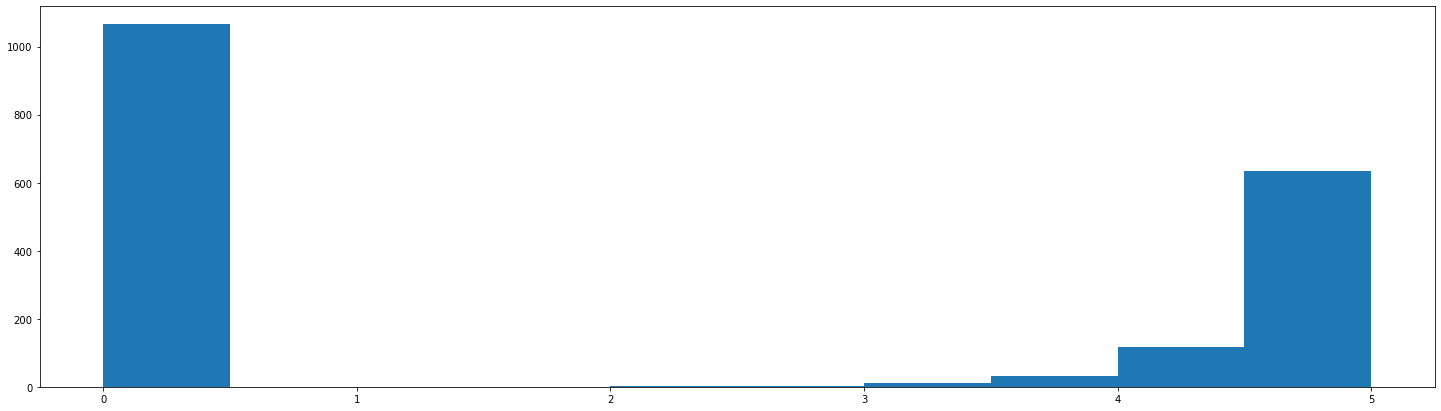

In [70]:
plt.figure(figsize=(25,7));
plt.hist(df.rating);

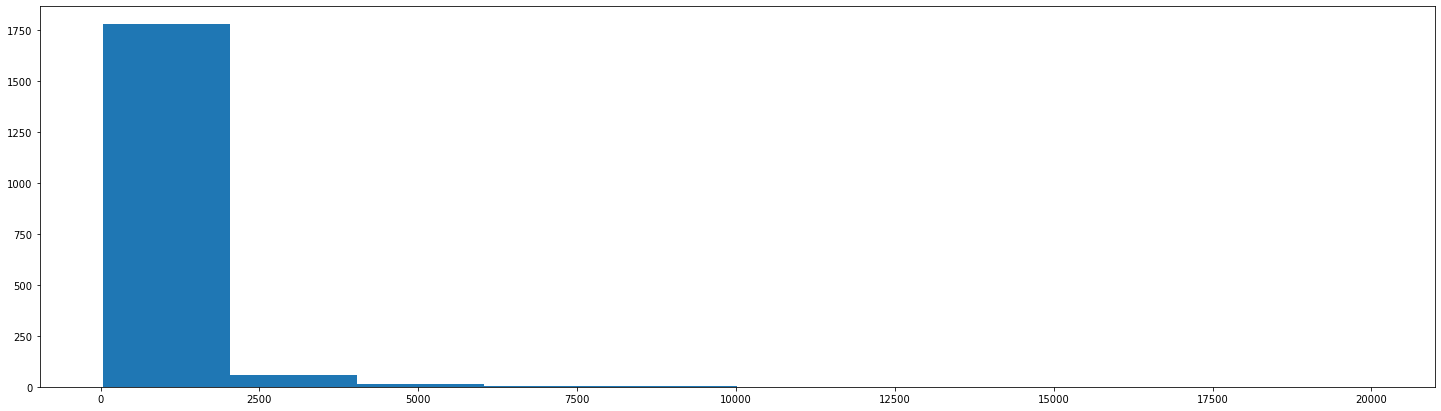

In [71]:
plt.figure(figsize=(25,7));
plt.hist(df.price);

In [278]:
df = pd.read_csv('data_v8_127col.csv', index_col=0)

In [279]:
sum(df['superhost'].isna())

0

In [280]:
df.shape

(1864, 128)

In [281]:
c = [ 'free carport',
 'free residential garage']

In [285]:
#df = combine_certain_columns(c, 'free parking', df)


In [286]:
c = ['Blender','Bread maker','Freezer','Iron','Microwave','Toaster','Rice maker']

df = combine_certain_columns(c, 'appliance', df)

7
(1864, 127)
# some values sum to more than 1
(1864, 120)


In [289]:
c = ['Board games','Books and reading material',
               'Ping pong table','Record player']

df = combine_certain_columns(c, 'entertainment', df)

4
(1864, 119)
# some values sum to more than 1
(1864, 115)


In [290]:
#df = find_and_remove('sauna', df)

data size before (1864, 115).
1
column is not found


In [291]:
c = ['Fire extinguisher', 'Fireplace guards', 'Outlet covers','Safe',
 'Security cameras on property','Smoke alarm']

df = combine_certain_columns(c, 'safety', df)

6
(1864, 116)
# some values sum to more than 1
(1864, 110)


C:\Users\elaaf\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [294]:
df = combine_certain_columns(['Boat slip',  'Kayak'], 'boat', df)


2
(1864, 111)
# some values sum to more than 1
(1864, 109)


C:\Users\elaaf\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [295]:
sum(df['wifi'])

1168

In [ ]:
'internet': ['Ethernet connection', 'wifi']

In [296]:
df = combine_certain_columns(['Ethernet connection', 'wifi'], 'internet', df)


2
(1864, 110)
# some values sum to more than 1
(1864, 108)


In [299]:
df = combine_certain_columns(['Mini fridge'], 'refrigerator', df)


1
(1864, 108)
# some values sum to more than 1
(1864, 107)


In [302]:
df = combine_certain_columns(['Window AC unit'], 'air conditioning', df)


1
(1864, 107)
# some values sum to more than 1
(1864, 106)


In [303]:
df = combine_certain_columns([ 'Paid street parking off premises'], 'paid parking', df)


1
(1864, 106)
# some values sum to more than 1
(1864, 105)


In [293]:
#sum(df['safety'])

1055

In [211]:
x = list(df.columns)
x.sort()
x

['Baking sheet',
 'Bathtub',
 'Beach essentials',
 'Bed_num',
 'Bikes',
 'Blender',
 'Board games',
 'Boat slip',
 'Books and reading material',
 'Bread maker',
 'Breakfast',
 'Building staff',
 'Carbon monoxide alarm',
 'Ceiling fan',
 'Cleaning before checkout',
 'Cleaning products',
 'Cooking basics',
 'Dining table',
 'EV charger',
 'Elevator',
 'Essentials',
 'Ethernet connection',
 'Fire extinguisher',
 'Fire pit',
 'Fireplace guards',
 'First aid kit',
 'Freezer',
 'Hammock',
 'Host greets you',
 'Hot tub',
 'Iron',
 'Kayak',
 'Keypad',
 'Lake access',
 'Laundromat nearby',
 'Lock on bedroom door',
 'Lockbox',
 'Long term stays allowed',
 'Luggage dropoff allowed',
 'Microwave',
 'Mini fridge',
 'Mosquito net',
 'Outdoor dining area',
 'Outdoor furniture',
 'Outdoor shower',
 'Outlet covers',
 'Paid resort access',
 'Paid street parking off premises',
 'Pets allowed',
 'Piano',
 'Ping pong table',
 'Portable fans',
 'Portable heater',
 'Private entrance',
 'Private hot tub',
 'P

In [304]:
df.to_csv('data_v9.csv')